<a href="https://colab.research.google.com/github/RajarshiRay25/Breast-Cancer-Classification-using-ANN-Deep-Learning/blob/main/ANN_Project_Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# download dataset through wget github

%%bash

wget 'https://raw.githubusercontent.com/RajarshiRay25/ML_Datasets-Kaggle/main/6-Breast%20Cancer/brca.csv'

--2023-10-14 10:17:55--  https://raw.githubusercontent.com/RajarshiRay25/ML_Datasets-Kaggle/main/6-Breast%20Cancer/brca.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124888 (122K) [text/plain]
Saving to: ‘brca.csv’

     0K .......... .......... .......... .......... .......... 40% 1.78M 0s
    50K .......... .......... .......... .......... .......... 81% 9.55M 0s
   100K .......... .......... .                               100% 48.8M=0.03s

2023-10-14 10:17:55 (3.61 MB/s) - ‘brca.csv’ saved [124888/124888]



In [3]:
# import the dataset

df = pd.read_csv("./brca.csv")
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [4]:
df.columns

Index(['Unnamed: 0', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [7]:
# Dataset description

df.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [9]:
# Check null values

df.isnull().sum()

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

In [10]:
# Value counts of target column - y

df.y.value_counts()

B    357
M    212
Name: y, dtype: int64

In [11]:
category_map = {
    'B' : 0,
    'M' : 1
}

In [12]:
df['y'] = df.y.map(category_map)

In [13]:
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


In [14]:
df.shape

(569, 31)

## Dataset features

1. Independant features - Tumor cytological parameters
2. Dependant features - Tumor type : B (Benign) & M (Malignant)

### Create Train test split and sklearn dependancy

In [15]:
X = df.drop(['y'],axis=1)
y = df.y

In [16]:
X.shape , y.shape

((569, 30), (569,))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.25)

In [19]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [20]:
# Scale the indepedant parameters

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled

array([[ 0.61029764, -0.8365472 ,  0.51697861, ...,  0.31394271,
        -0.96667878, -0.65577735],
       [ 1.26860999, -0.5136255 ,  1.19187764, ...,  0.792857  ,
        -0.01703433,  0.05673336],
       [-1.30801339,  1.93330227, -1.31939335, ..., -1.73617303,
        -0.68690138, -0.80746193],
       ...,
       [-0.77327408,  0.42785043, -0.78513197, ..., -0.48555711,
        -0.12095166,  0.27525214],
       [ 1.34671484,  0.43922091,  1.2807865 , ...,  0.96659562,
        -0.56539805, -1.02830538],
       [ 0.13051067, -1.30046287,  0.09627808, ..., -0.34837913,
        -0.44549345, -0.76154974]])

In [37]:
X_test_scaled

array([[-1.05779891, -0.68873093, -1.07489401, ..., -1.37645855,
        -0.3575634 , -0.55756014],
       [-0.34090792, -1.19812853, -0.28118042, ...,  0.62213992,
        -0.42470998,  1.98853238],
       [-0.41622331, -0.50680321, -0.45616921, ..., -0.24791289,
         0.5840874 , -0.59766066],
       ...,
       [-0.07311984,  0.05035042, -0.1304395 , ..., -0.84632913,
        -0.62614971, -0.84116962],
       [ 0.76092843,  0.01851307,  0.66650714, ..., -0.46168693,
        -0.60376752, -1.38688541],
       [-0.61985383,  0.40738356, -0.62711669, ..., -0.48782326,
         0.27233544, -0.58545615]])

## Applying and initialising ANN with tensorflow and keras

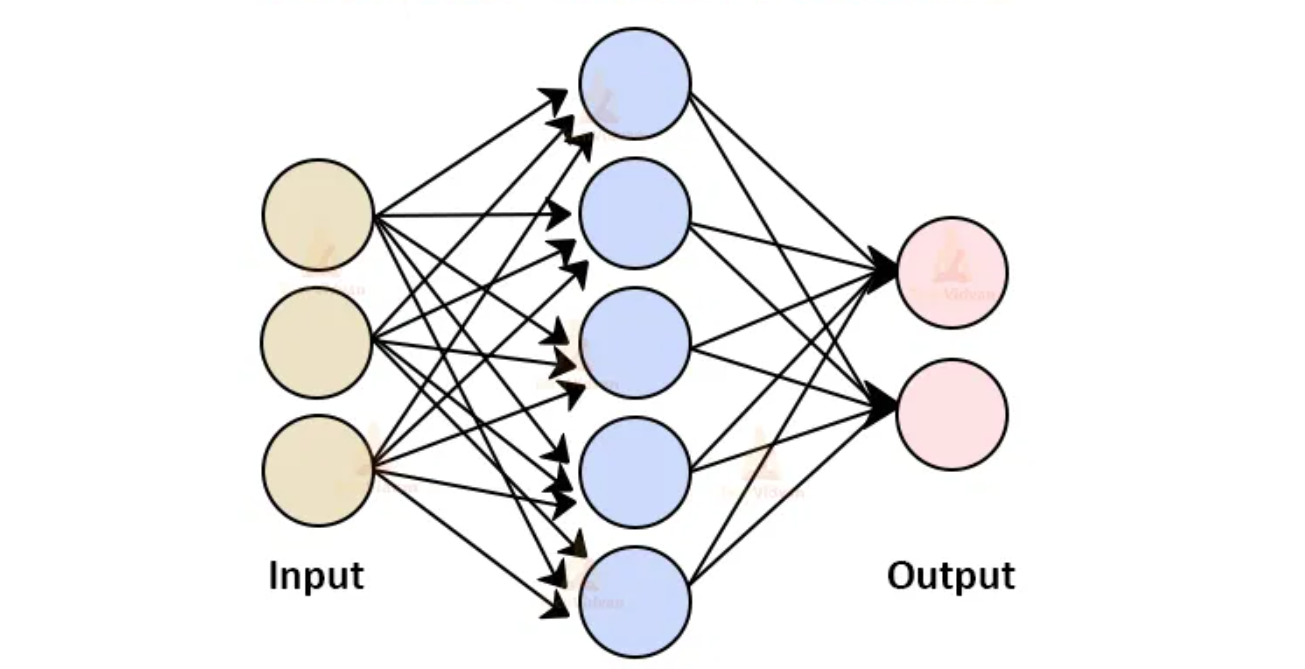


In [23]:
import tensorflow as tf
tf.random.set_seed(2)
from tensorflow import keras

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), # input layer
    keras.layers.Dense(30,activation="relu"), # hidden layer 1
    keras.layers.Dense(20,activation="relu"), # hidden layer 2
    keras.layers.Dense(2,activation="sigmoid") # output layer
    ])

In [25]:
# compile model

model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [26]:
# model training

history = model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
12/12 [==============================] - 1s 24ms/step - loss: 0.7355 - accuracy: 0.4386 - val_loss: 0.6418 - val_accuracy: 0.4651
Epoch 2/10
12/12 [==============================] - 0s 5ms/step - loss: 0.5388 - accuracy: 0.7911 - val_loss: 0.4843 - val_accuracy: 0.9070
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 0.3981 - accuracy: 0.9347 - val_loss: 0.3665 - val_accuracy: 0.9070
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.9399 - val_loss: 0.2831 - val_accuracy: 0.9302
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.2139 - accuracy: 0.9478 - val_loss: 0.2337 - val_accuracy: 0.9302
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 0.1674 - accuracy: 0.9530 - val_loss: 0.2010 - val_accuracy: 0.9302
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 0.1369 - accuracy: 0.9634 - val_loss: 0.1786 - val_accuracy: 0.9302
Epoch 8/10
12/12 [=

## Visualising the loss and accuracy vs epochs

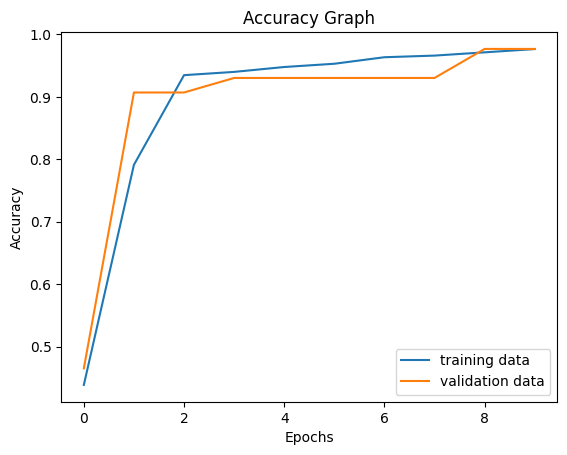

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training data', 'validation data'], loc = 'lower right')

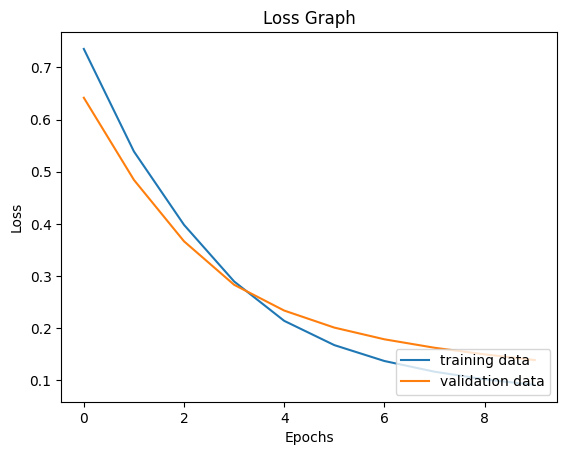

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training data', 'validation data'], loc = 'lower right')

## Evaluate and test the model on testing data

In [38]:
loss,accuracy = model.evaluate(X_test_scaled,y_test)
print(accuracy)

5/5 [==============================] - 0s 3ms/step - loss: 0.0920 - accuracy: 0.9860
0.9860140085220337


In [39]:
# Predict values

y_pred = model.predict(X_test_scaled)
y_pred

5/5 [==============================] - 0s 4ms/step


array([[0.75349   , 0.01081547],
       [0.8651233 , 0.22507863],
       [0.65691775, 0.07565871],
       [0.17393512, 0.9833947 ],
       [0.13501665, 0.90740013],
       [0.73823637, 0.01296594],
       [0.08155414, 0.9984685 ],
       [0.6385173 , 0.15621285],
       [0.28349215, 0.8689537 ],
       [0.6121032 , 0.12253508],
       [0.57180053, 0.09399861],
       [0.33131292, 0.8983761 ],
       [0.32846415, 0.5404038 ],
       [0.17525052, 0.98331463],
       [0.8307182 , 0.37245476],
       [0.0583425 , 0.9724911 ],
       [0.79495   , 0.04850456],
       [0.7695821 , 0.13021769],
       [0.7690872 , 0.05756726],
       [0.69145423, 0.04255318],
       [0.73195493, 0.05330525],
       [0.7301566 , 0.00373851],
       [0.7399342 , 0.10447019],
       [0.794977  , 0.01229775],
       [0.609958  , 0.7729892 ],
       [0.693593  , 0.04015494],
       [0.20153296, 0.90209466],
       [0.82724863, 0.04857443],
       [0.8192378 , 0.07048173],
       [0.76787245, 0.16278581],
       [0.

In [46]:
for i in y_pred:
  print(i)

[0.75349    0.01081547]
[0.8651233  0.22507863]
[0.65691775 0.07565871]
[0.17393512 0.9833947 ]
[0.13501665 0.90740013]
[0.73823637 0.01296594]
[0.08155414 0.9984685 ]
[0.6385173  0.15621285]
[0.28349215 0.8689537 ]
[0.6121032  0.12253508]
[0.57180053 0.09399861]
[0.33131292 0.8983761 ]
[0.32846415 0.5404038 ]
[0.17525052 0.98331463]
[0.8307182  0.37245476]
[0.0583425 0.9724911]
[0.79495    0.04850456]
[0.7695821  0.13021769]
[0.7690872  0.05756726]
[0.69145423 0.04255318]
[0.73195493 0.05330525]
[0.7301566  0.00373851]
[0.7399342  0.10447019]
[0.794977   0.01229775]
[0.609958  0.7729892]
[0.693593   0.04015494]
[0.20153296 0.90209466]
[0.82724863 0.04857443]
[0.8192378  0.07048173]
[0.76787245 0.16278581]
[0.08221257 0.9880754 ]
[0.39950767 0.82269967]
[0.9178992  0.00432407]
[0.5996536 0.993898 ]
[0.6674086  0.30363056]
[0.38949123 0.3554458 ]
[0.7572754  0.01027145]
[0.6404885 0.4041357]
[0.6506427 0.1564935]
[0.7652438  0.34277064]
[0.8577539 0.026102 ]
[0.4592962  0.93024343]
[0.1

# Interpreting the results : probability based on how much probability on each class

In [41]:
# View first result

y_pred[0]   # --> [probability on Category 1 , probability on Category 2]

array([0.75349   , 0.01081547], dtype=float32)

In [42]:
np.argmax(y_pred[0])  # return the index of max value - hence max probability

0

In [43]:
if np.argmax(y_pred[0]) == 0:
  print("Benign Tumor")
else:
  print("Malignant Tumor")

Benign Tumor
